# Is there any pattern just before or after certain events? For example, Sales patterns before or after Christmas

In [31]:
# import required lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import plotly.express as px
import datetime
import holidays
#!pip install holidays
#from datetime import date

import warnings
warnings.filterwarnings("ignore")

#### Sweden Holiday Data

In [154]:
#function to get from and to dates
# list_condition = ["future","past"]
# date = 2018-05-31
# days =20
def event(date,days):
    try:
        from_date = date + datetime.timedelta(days=(-1*days))
        to_date = date + datetime.timedelta(days=days)
        return from_date,to_date
    except:
        print("Exception")
#function to get the holiday data(stroes as csv holiday file and returns as a pandas dataframe)
def holiday(from_year,to_year,days):
    try:
        date = []
        holiday = []
        year = []
        from_date = []
        to_date = []
        for i in range(from_year,to_year,1):
            # Print all the Sweden holidays in year 2018
            for ptr in holidays.Sweden(years = i).items():
                if ptr[1] != "Söndag":
                    date.append(ptr[0])
                    holiday.append(ptr[1])
                    year.append(i)
                    from_date_1,to_date_1 = event(ptr[0],days)
                    from_date.append(from_date_1)
                    to_date.append(to_date_1)
        holiday_data = pd.DataFrame([year,date,holiday,from_date,to_date]).transpose()
        holiday_data.columns = ['year','Date','holiday','past_date','future_date']
        holiday_data['holiday'] = holiday_data['holiday'].str.replace(', Söndag', '')
        holiday_data.to_csv("holiday")
    except:
        print("Exception")
    return holiday_data

In [155]:
holiday_data = holiday(2017,2021,20)

In [156]:
holiday_data.holiday.unique()

array(['Nyårsdagen', 'Påskdagen', 'Pingstdagen', 'Julafton', 'Nyårsafton',
       'Trettondedag jul', 'Första maj', 'Sveriges nationaldag',
       'Juldagen', 'Annandag jul', 'Långfredagen', 'Annandag påsk',
       'Kristi himmelsfärdsdag', 'Midsommarafton', 'Midsommardagen',
       'Alla helgons dag'], dtype=object)

# Load data

In [32]:
#Read the data
orders_all = pd.read_csv("perf_test_orderdata/orders_all.csv")
orders_times = pd.read_csv("perf_test_orderdata/orders_times.csv")

In [33]:
#join the column to connect the two csv data
merge = pd.merge(orders_all,orders_times,how='left',on='admin_reference')

# Prepare Data

In [34]:
#drop the features which has most null values
orders = merge.drop(['completed_at_x','customer_company','bill_state_name','ship_state_name','ship_company','subsite_store','campaign_code','bill_company'],axis=1)

In [35]:
#prepasre the dat 
def prep_data(data):
    #Date and time is splitted
    new = data["completed_at_y"].str.split(" ", n = 1, expand = True) 
    data['Date'] = new[0]
    data['Time'] = new[1]
    #Day, month and year is splitted
    new = data["Date"].str.split("-", n = 2, expand = True) 
    data['Year'] = new[0]
    data['Month'] = new[1]
    data['Day'] = new[2]
    #drop null values
    data = data.dropna()
    #convert month number to month name
    data['Month'] = data['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])
    #Date and time is splitted
    new = data["Time"].str.split(":", n = 1, expand = True) 
    data['Hour'] = new[0]
    data['Minute'] = new[1]

    data['Date'] = pd.to_datetime(data['Date'])  # Step 1
    data['DayofWeek'] =data['Date'].dt.day_name()  # Step 2
    data.drop([ 'state', 'shipment_state',
       'currency', 'bill_zipcode',
       'ship_city', 'ship_zipcode', 'ship_country_iso_name'],axis=1)
    data['Day'] = data['Day'].astype(int)
    data['total'] = pd.to_numeric(data['total'])
    data['quantity'] = data['quantity'].astype(int)
    data['Year'] = data['Year'].astype(int)
    data['Hour'] = data['quantity'].astype(int)
    data['Minute'] = data['quantity'].astype(int)
    return data

In [36]:
orders = prep_data(orders)
campaign_code = prep_data(campaign_code)

In [37]:
orders.head(2)

,admin_reference,state,payment_state,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,ship_city,...,sku,completed_at_y,Date,Time,Year,Month,Day,Hour,Minute,DayofWeek
1,O160651894,complete,paid,ready,97.21,NOK,Hafrsfjord,4048,NO,Hafrsfjord,...,WEB7098,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,1,1,Thursday
2,O160651894,complete,paid,ready,97.21,NOK,Hafrsfjord,4048,NO,Hafrsfjord,...,WEB7080,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,1,1,Thursday


#### Christmas past 3 week sales pattern

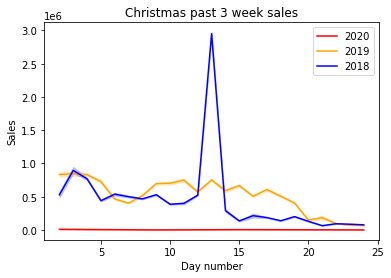

In [54]:
sns.lineplot(data = orders[(orders['Date'] > '2020-12-01') & (orders['Date'] < '2020-12-25')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['red'])
sns.lineplot(data = orders[(orders['Date'] > '2019-12-01') & (orders['Date'] < '2019-12-25')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['orange'])
sns.lineplot(data = orders[(orders['Date'] > '2018-12-01') & (orders['Date'] < '2018-12-25')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['blue'])
sns.lineplot(data = orders[(orders['Date'] > '2017-12-01') & (orders['Date'] < '2017-12-25')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['green'])
plt.title('Christmas past 3 week sales')
plt.ylabel('Sales')
plt.xlabel('Day number')
plt.legend()
plt.show()

#### After Christmas and before New year sales

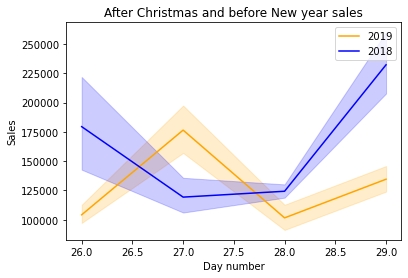

In [60]:
sns.lineplot(data = orders[(orders['Date'] > '2020-12-25') & (orders['Date'] < '2020-12-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['red'])
sns.lineplot(data = orders[(orders['Date'] > '2019-12-25') & (orders['Date'] < '2019-12-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['orange'])
sns.lineplot(data = orders[(orders['Date'] > '2018-12-25') & (orders['Date'] < '2018-12-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['blue'])
sns.lineplot(data = orders[(orders['Date'] > '2017-12-25') & (orders['Date'] < '2017-12-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['green'])
plt.title('After Christmas and before New year sales')
plt.ylabel('Sales')
plt.xlabel('Day number')
plt.legend()
plt.show()

#### After New year sales (Month)

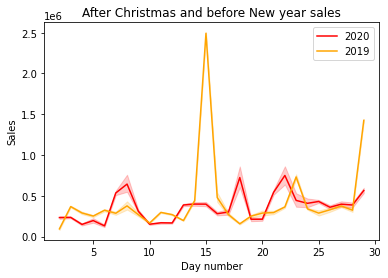

In [61]:
sns.lineplot(data = orders[(orders['Date'] > '2020-01-01') & (orders['Date'] < '2020-01-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['red'])
sns.lineplot(data = orders[(orders['Date'] > '2019-01-01') & (orders['Date'] < '2019-01-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['orange'])
sns.lineplot(data = orders[(orders['Date'] > '2018-01-01') & (orders['Date'] < '2018-01-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['blue'])
sns.lineplot(data = orders[(orders['Date'] > '2017-01-01') & (orders['Date'] < '2017-01-30')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['green'])
plt.title('After Christmas and before New year sales')
plt.ylabel('Sales')
plt.xlabel('Day number')
plt.legend()
plt.show()

#### Before Valentine's Day sales (Two week)

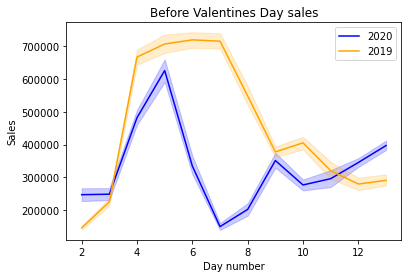

In [309]:
sns.lineplot(data = orders[(orders['Date'] > '2020-02-01') & (orders['Date'] < '2020-02-14')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['blue'])
sns.lineplot(data = orders[(orders['Date'] > '2019-02-01') & (orders['Date'] < '2019-02-14')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['orange'])
sns.lineplot(data = orders[(orders['Date'] > '2018-02-01') & (orders['Date'] < '2018-02-14')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['green'])
sns.lineplot(data = orders[(orders['Date'] > '2017-02-01') & (orders['Date'] < '2017-02-14')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['red'])
plt.title('Before Valentines Day sales')
plt.ylabel('Sales')
plt.xlabel('Day number')
plt.legend()
plt.show()

#### After Valentine's Day sales (Two week)

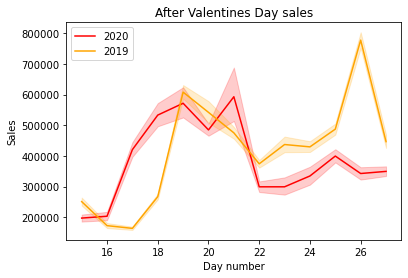

In [64]:
sns.lineplot(data = orders[(orders['Date'] > '2020-02-14') & (orders['Date'] < '2020-02-28')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['red'])
sns.lineplot(data = orders[(orders['Date'] > '2019-02-14') & (orders['Date'] < '2019-02-28')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['orange'])
sns.lineplot(data = orders[(orders['Date'] > '2018-02-14') & (orders['Date'] < '2018-02-28')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['blue'])
sns.lineplot(data = orders[(orders['Date'] > '2017-02-14') & (orders['Date'] < '2017-02-28')], x ="Day", y ="total" , hue = 'Year',estimator = sum,palette=['green'])
plt.title('After Valentines Day sales')
plt.ylabel('Sales')
plt.xlabel('Day number')
plt.legend()
plt.show()

## Insights manually

In [166]:
holiday_list = holiday_data.holiday.unique()
holiday_list

array(['Nyårsdagen', 'Påskdagen', 'Pingstdagen', 'Julafton', 'Nyårsafton',
       'Trettondedag jul', 'Första maj', 'Sveriges nationaldag',
       'Juldagen', 'Annandag jul', 'Långfredagen', 'Annandag påsk',
       'Kristi himmelsfärdsdag', 'Midsommarafton', 'Midsommardagen',
       'Alla helgons dag'], dtype=object)

In [247]:
start_date = min(orders.Date)
end_date = max(orders.Date)

Nyårsdagen  Past Sales Graph


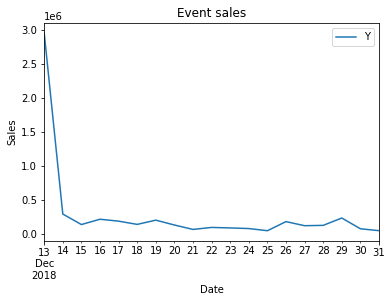

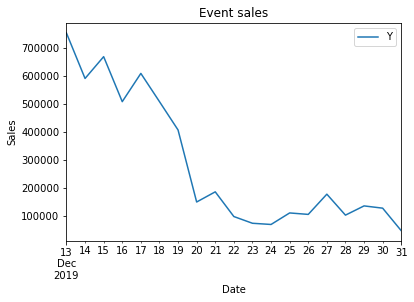

Påskdagen  Past Sales Graph


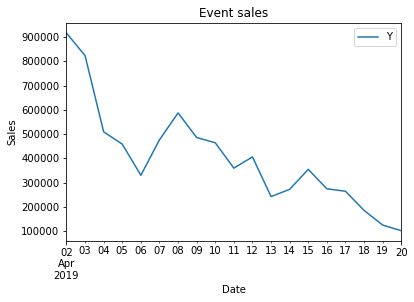

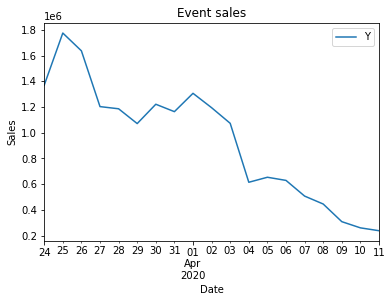

Pingstdagen  Past Sales Graph


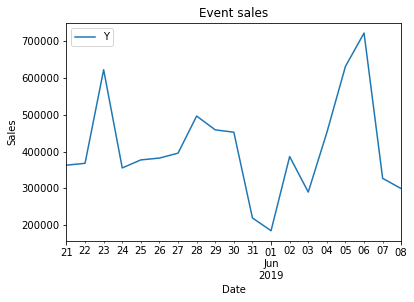

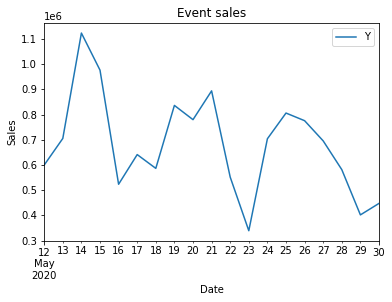

Julafton  Past Sales Graph


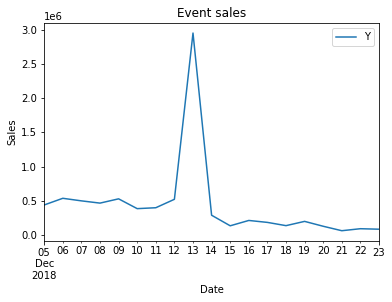

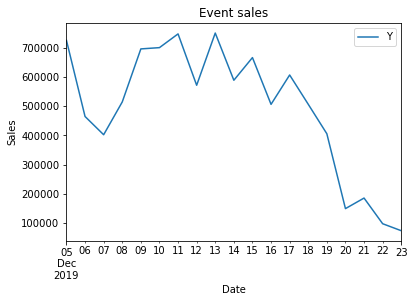

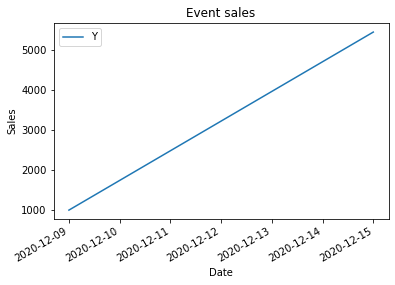

Nyårsafton  Past Sales Graph


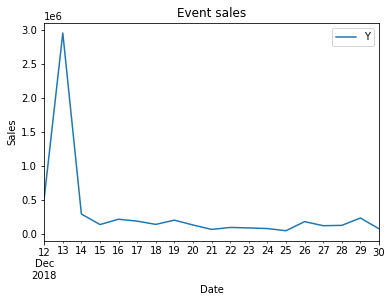

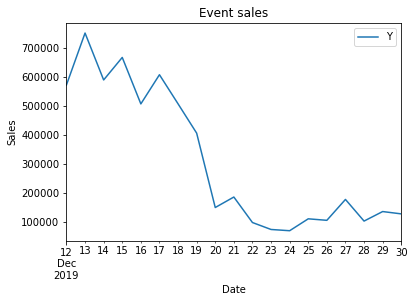

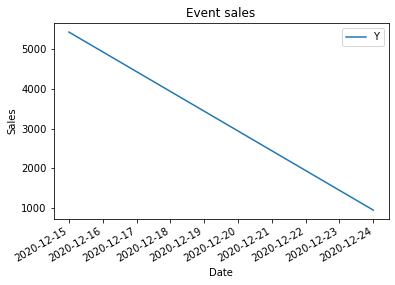

Trettondedag jul  Past Sales Graph


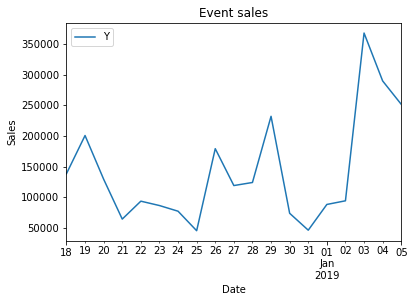

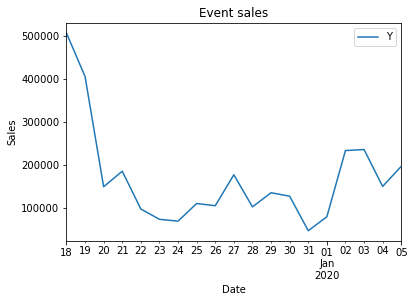

Första maj  Past Sales Graph


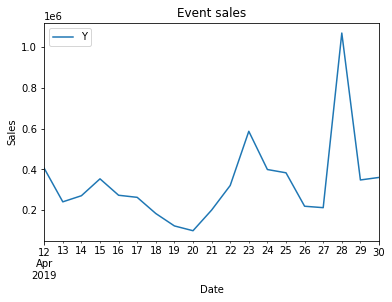

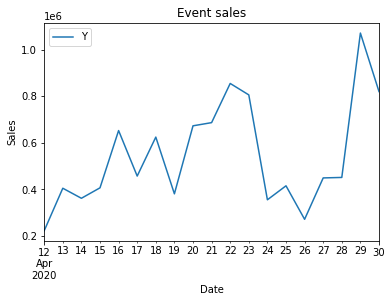

Sveriges nationaldag  Past Sales Graph


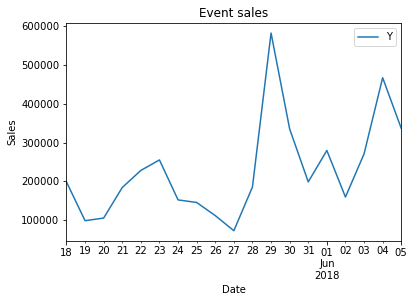

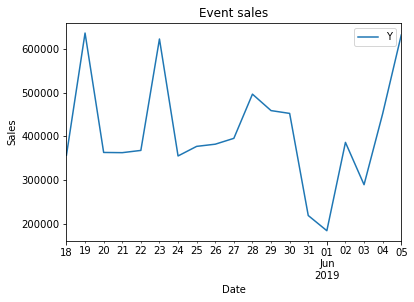

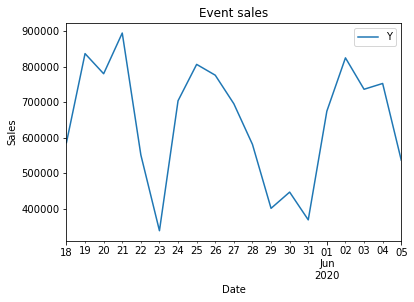

Juldagen  Past Sales Graph


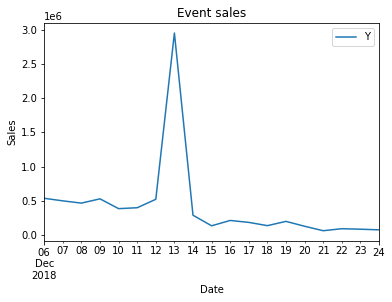

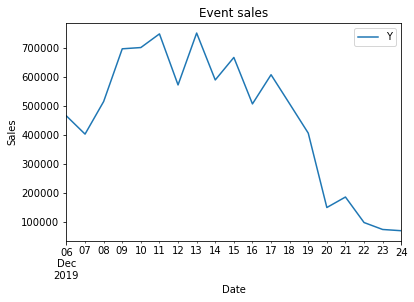

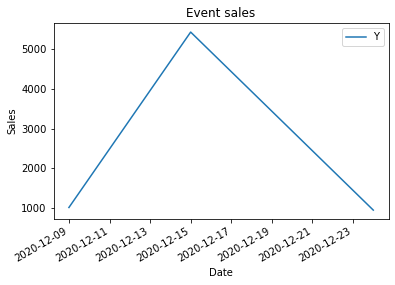

Annandag jul  Past Sales Graph


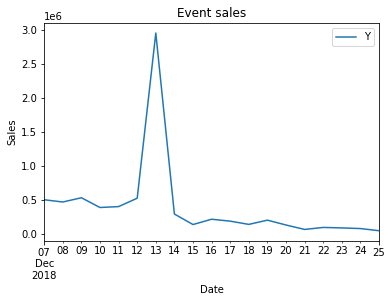

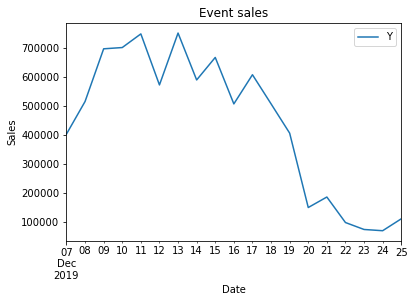

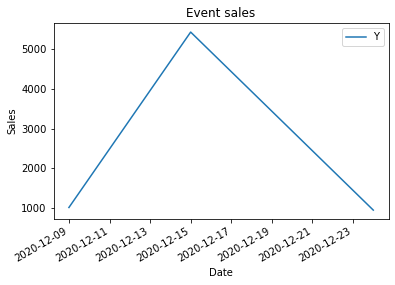

Långfredagen  Past Sales Graph


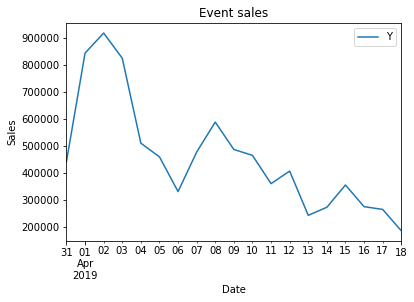

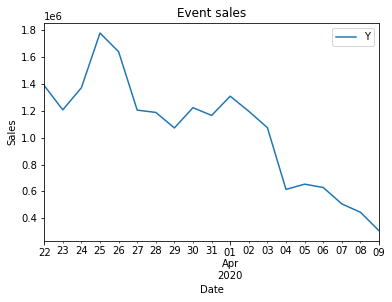

Annandag påsk  Past Sales Graph


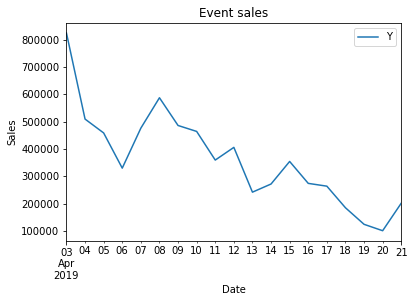

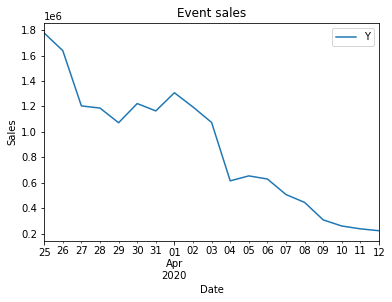

Kristi himmelsfärdsdag  Past Sales Graph


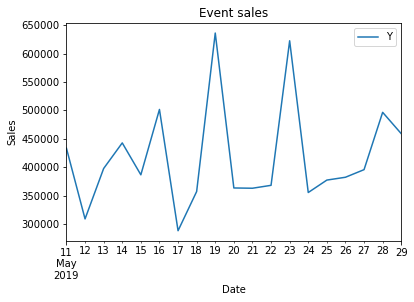

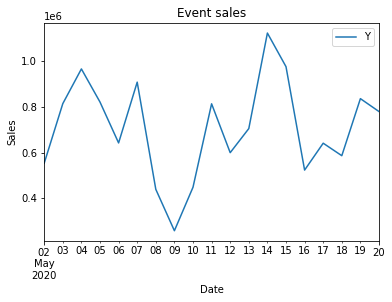

Midsommarafton  Past Sales Graph


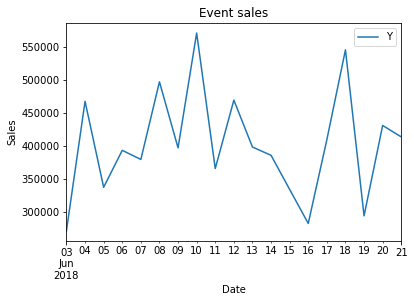

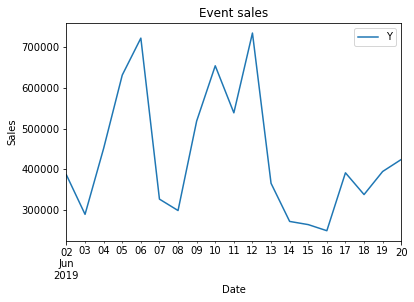

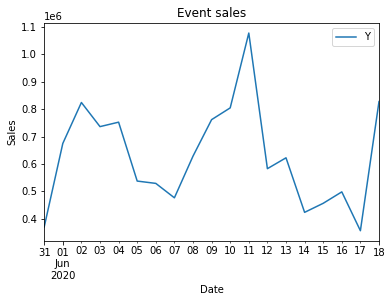

Midsommardagen  Past Sales Graph


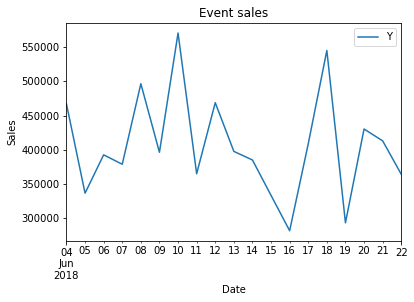

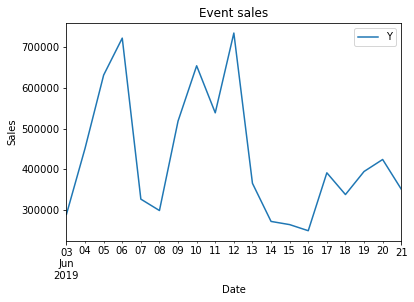

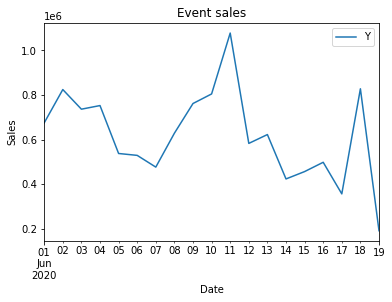

Alla helgons dag  Past Sales Graph


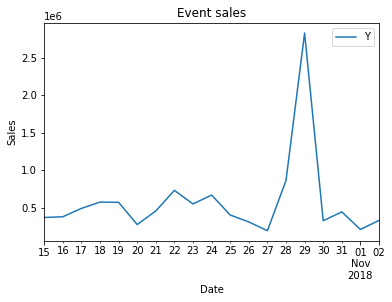

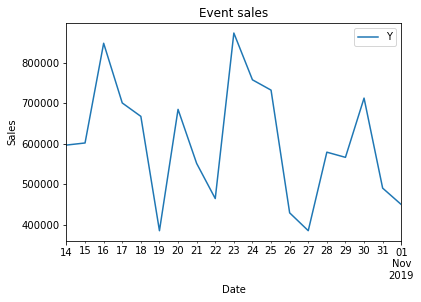

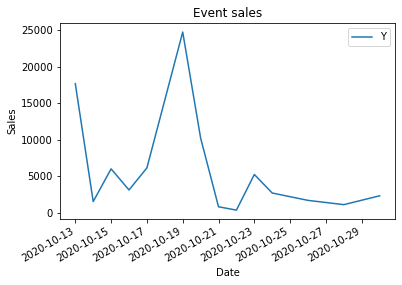

In [277]:
for j in holiday_list:
    past_date = holiday_data[holiday_data["holiday"]==j].past_date.to_list()
    Date = holiday_data[holiday_data["holiday"]==j].Date.to_list()
    future_date = holiday_data[holiday_data["holiday"]==j].future_date.to_list()
    print(j, " Past Sales Graph")
    for i in range(0,len(past_date)):
        if past_date[i] > min(orders.Date):
            data = orders[(orders['Date'] > str(past_date[i])) & (orders['Date'] < str(Date[i]))]   
            data.groupby(by=["Date"]).sum()['total'].plot(kind="line")
            plt.title("Event sales")
            plt.ylabel('Sales')
            plt.xlabel('Date')
            plt.legend("Year")
            plt.show()

Nyårsdagen  Future Sales Graph


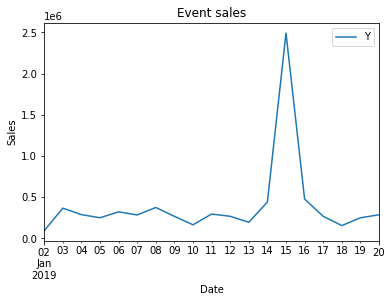

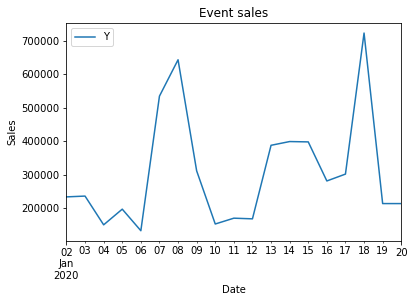

Påskdagen  Future Sales Graph


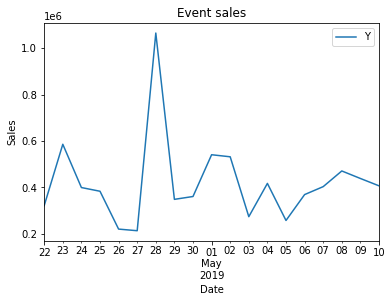

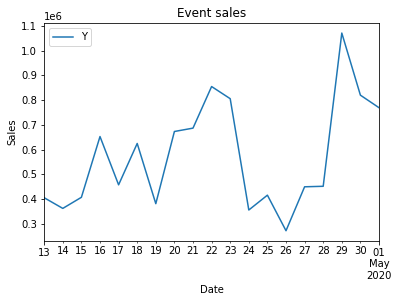

Pingstdagen  Future Sales Graph


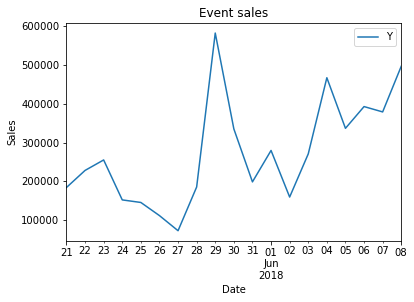

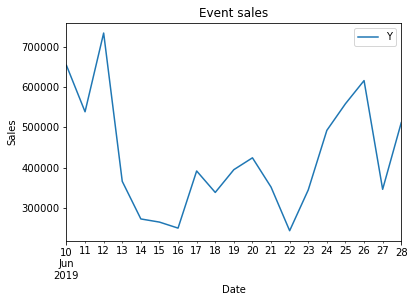

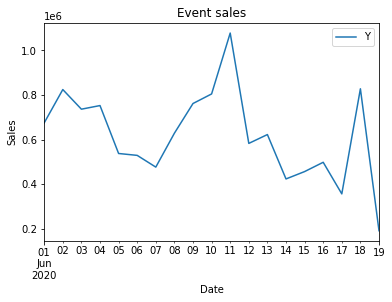

Julafton  Future Sales Graph


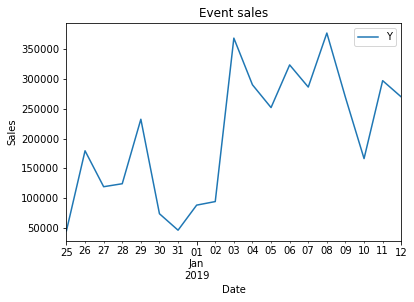

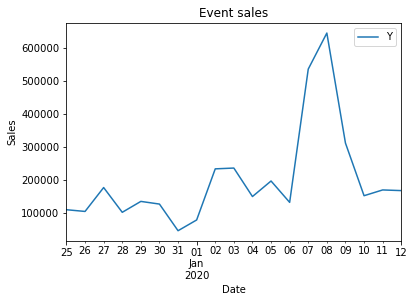

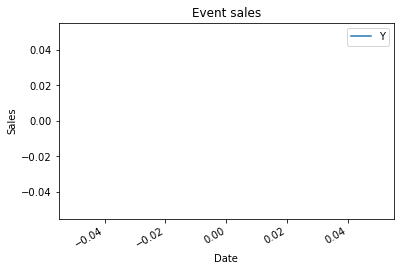

Nyårsafton  Future Sales Graph


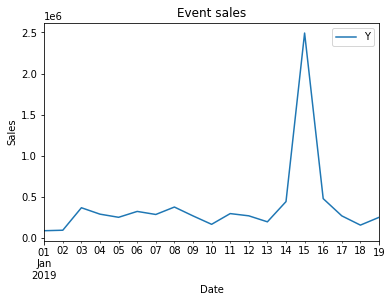

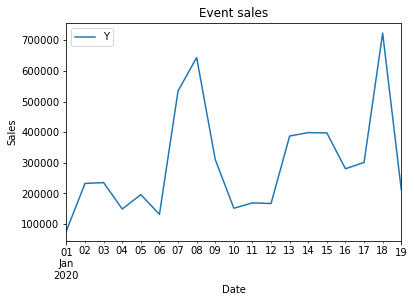

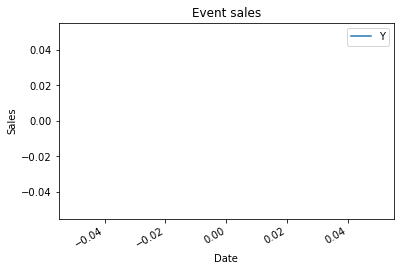

Trettondedag jul  Future Sales Graph


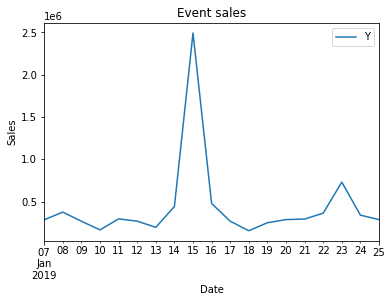

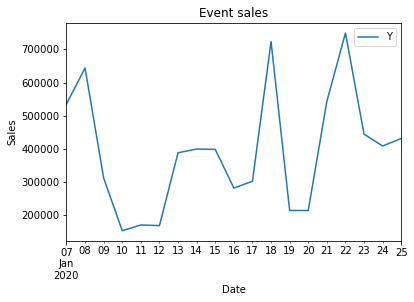

Första maj  Future Sales Graph


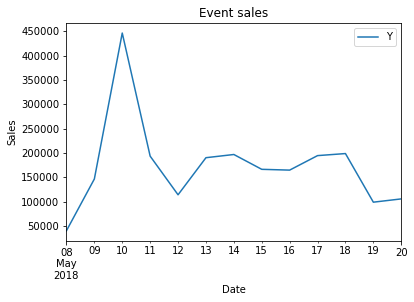

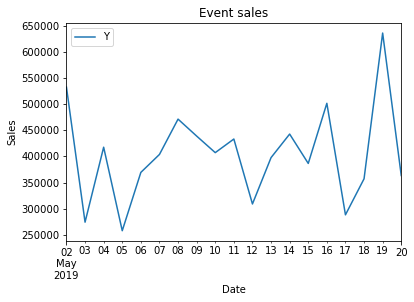

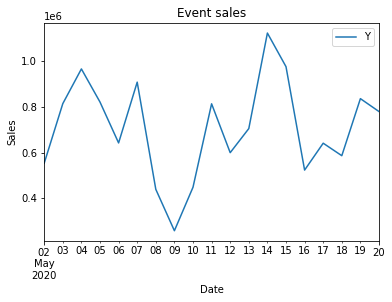

Sveriges nationaldag  Future Sales Graph


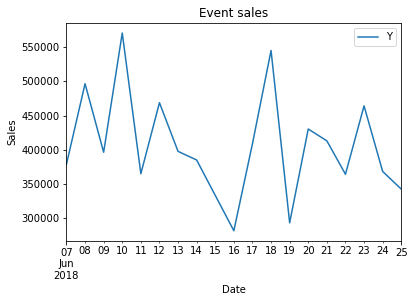

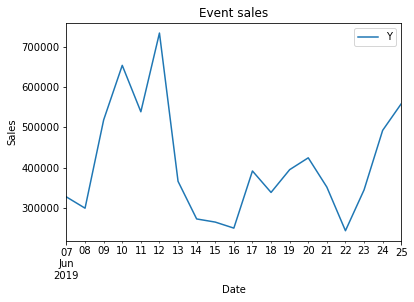

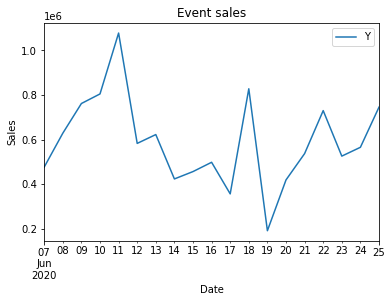

Juldagen  Future Sales Graph


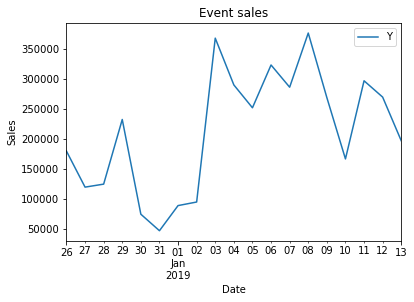

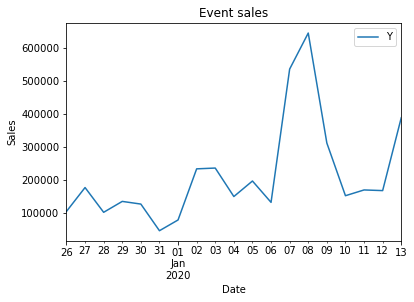

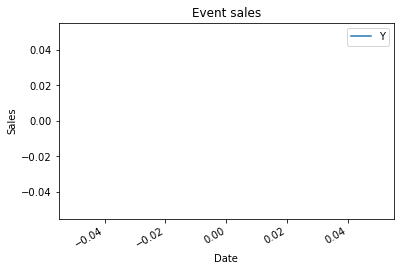

Annandag jul  Future Sales Graph


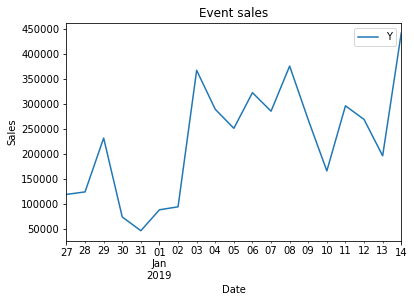

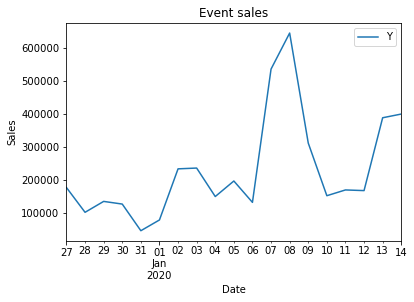

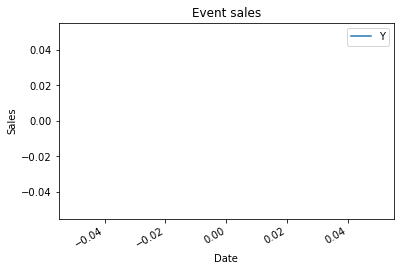

Långfredagen  Future Sales Graph


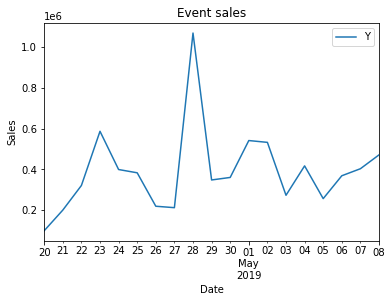

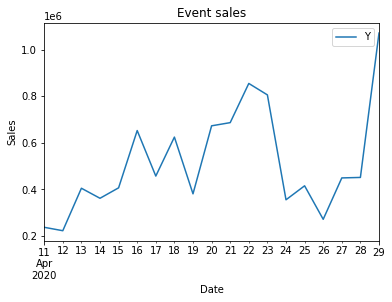

Annandag påsk  Future Sales Graph


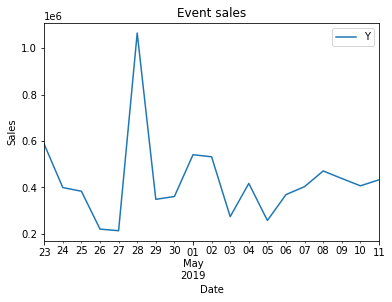

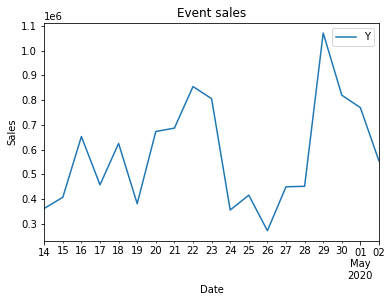

Kristi himmelsfärdsdag  Future Sales Graph


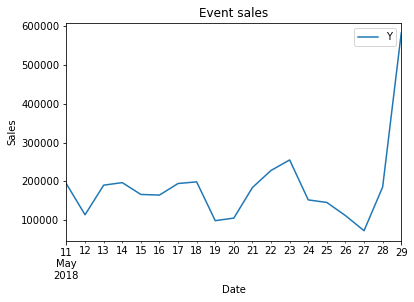

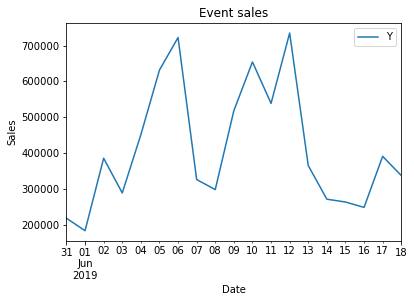

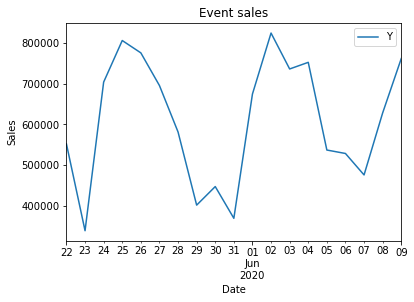

Midsommarafton  Future Sales Graph


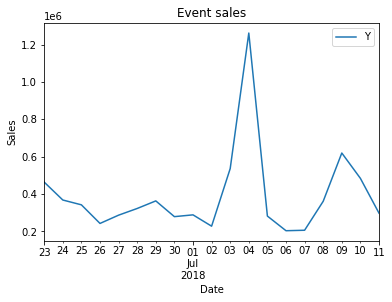

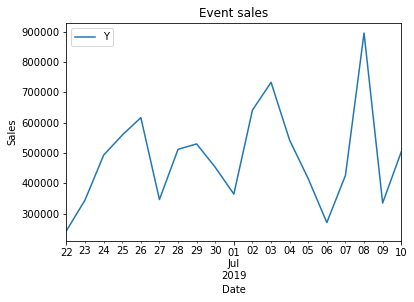

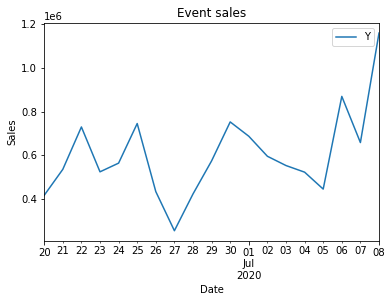

Midsommardagen  Future Sales Graph


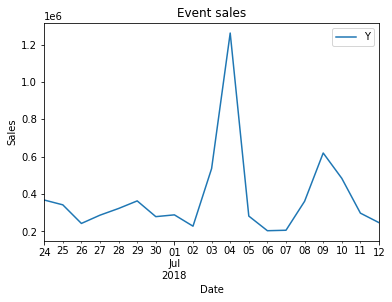

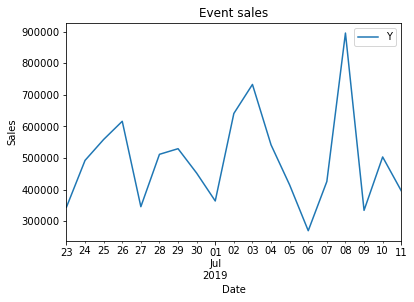

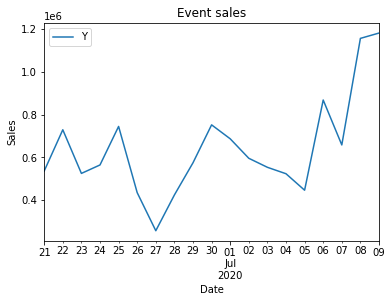

Alla helgons dag  Future Sales Graph


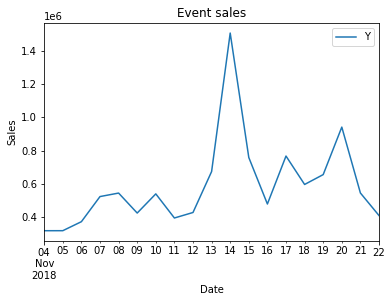

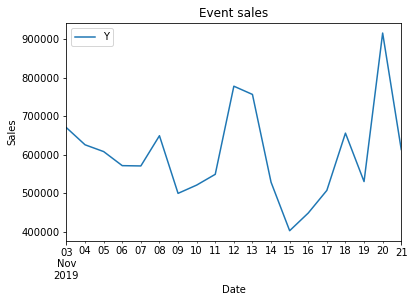

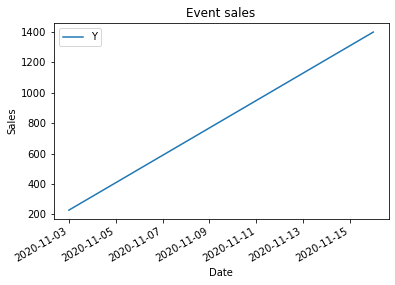

In [278]:
for j in holiday_list:
    past_date = holiday_data[holiday_data["holiday"]==j].past_date.to_list()
    Date = holiday_data[holiday_data["holiday"]==j].Date.to_list()
    future_date = holiday_data[holiday_data["holiday"]==j].future_date.to_list()
    print(j, " Future Sales Graph")
    for i in range(0,len(future_date)):
        if future_date[i] > min(orders.Date):
            data = orders[(orders['Date'] > str(Date[i])) & (orders['Date'] < str(future_date[i]))]   
            data.groupby(by=["Date"]).sum()['total'].plot(kind="line")
            plt.title("Event sales")
            plt.ylabel('Sales')
            plt.xlabel('Date')
            plt.legend("Year")
            plt.show()

# General event model prototype

### Filter: select Event. Select Future/Past. Legend(Last 4 years). X-axis = sales, Y-axis = Sales/Orders count.

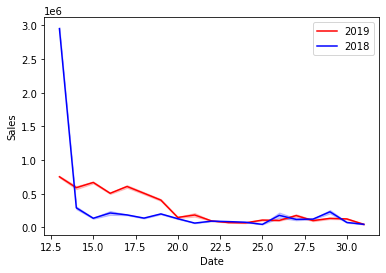

In [330]:
# to calculate past or future event date - from_date = date + datetime.timedelta(days=(-1*days))
# to get the uniquie holiday event list - holiday_data.holiday.unique()
#holiday data


'''
Logic:
1. List of events = "One Event".
2. 
3. Future/past.
4. calculate the dates .
5. apply it to orders data.


'''
#List of events 
events = holiday_data.holiday.unique()

#pass one event to holiday data and fetch past 4 year dates.
event_data = holiday_data[holiday_data.holiday == 'Nyårsdagen'].sort_values(by=['year'],ascending = False).head(4)

#select days 
days = 20

#select past or future
#future_past = ['Future','Past']
future_past = 'Past'

#select sales or orders
# y = ['quantity','total']
y='total'

#collect current year
current_year = datetime.date.today().year
    
#apply it to orders data and plot, before that add aloop which executes four times.
color = [['red'],['blue'],['orange'],['green']]

j = 0
if future_past == "Future":
    for i in event_data.Date:
        d = i + datetime.timedelta(days=(days))
        sns.lineplot(data = orders[(orders['Date'] > str(i)) & (orders['Date'] < str(d))], x ="Day", y =y , hue = 'Year',estimator = sum,palette=color[j])
        j = j+1
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.legend()
    plt.show()
elif future_past == 'Past':
    for i in event_data.Date:
        d = i + datetime.timedelta(days=(-1*days))
        sns.lineplot(data = orders[(orders['Date'] > str(d)) & (orders['Date'] < str(i))], x ="Day", y =y , hue = 'Year',estimator = sum,palette=color[j])
        j = j+1
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.legend()
    plt.show()
else:
    print("Date is not correct")

2019-12-17
2018-12-17
2017-12-17
2016-12-17


In [328]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862305 entries, 1 to 886932
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   admin_reference        862305 non-null  object        
 1   state                  862305 non-null  object        
 2   payment_state          862305 non-null  object        
 3   shipment_state         862305 non-null  object        
 4   total                  862305 non-null  float64       
 5   currency               862305 non-null  object        
 6   bill_city              862305 non-null  object        
 7   bill_zipcode           862305 non-null  object        
 8   bill_country_iso_name  862305 non-null  object        
 9   ship_city              862305 non-null  object        
 10  ship_zipcode           862305 non-null  object        
 11  ship_country_iso_name  862305 non-null  object        
 12  product_name           862305 non-null  obje

In [ ]:
holiday_data.head(2)

In [296]:
datetime.date.today().year

2021